In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [61]:
def read_csv(url, drop_first_row = False):
    
    if drop_first_row:
        
        csv = pd.read_csv(url, skiprows = 1, header = None, sep = ", ", engine = "python")
    
    else:
        
        csv = pd.read_csv(url, header = None, sep = ", ", engine = "python")
    
    csv.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
    
    return csv

In [62]:
adult_income = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [63]:
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


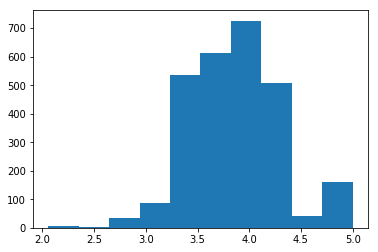

In [64]:
income = adult_income["capital-gain"][adult_income["capital-gain"] > 0]
plt.hist(np.log10(income))
plt.show()

In [65]:
print(len(adult_income["class"]))
print(len(adult_income[adult_income["class"] == "<=50K"]))

32561
24720


In [75]:
income_dummies = pd.get_dummies(adult_income)
train_x = income_dummies.drop("class_>50K", 1)
train_y = income_dummies["class_>50K"]

In [76]:
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
test_dataset = read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", drop_first_row = True)

In [82]:
test_dummies = pd.get_dummies(test_dataset)

print set(income_dummies.columns) - set(test_dummies.columns)
test_dummies.rename(columns = { "class_>50K.": "class_>50K", "class_<=50K.": "class_<=50K" }, inplace = True)
test_dummies["native-country_Holand-Netherlands"] = test_dummies.apply(lambda _: 0, axis=1)

test_x = test_dummies.drop("class_>50K", 1)
expected_y = test_dummies["class_>50K"]

set(['native-country_Holand-Netherlands', 'class_>50K', 'class_<=50K'])


- Fix test data - column/classes name mismatch (removed a `.` in the column name)
- The **training** set has people from Holand-Netherlands while the **test** set didn't => The dummy classes generated are missing the `native-country_Holand-Netherlands` column. Added a column filled with 0

In [81]:
test_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,native-country_Holand-Netherlands
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [70]:
y_predicted = model.predict(test_x)

In [83]:
print(model.coef_)
print(model.intercept_)

[[ -6.10294743e-03  -3.60550381e-06  -2.09361504e-03   3.37682451e-04
    7.79133100e-04  -9.41549540e-03  -3.02096027e-04   9.65284214e-05
    3.53140346e-05  -1.63042971e-06  -1.20024179e-03   2.30313123e-04
   -1.84796980e-05  -1.25509682e-05  -3.76240826e-06  -1.71585429e-04
   -2.45333738e-04  -7.83459138e-05  -2.92260441e-05  -5.74360889e-05
   -1.20566634e-04  -9.46422143e-05  -2.46349844e-05  -2.66769011e-05
    6.01399092e-04   1.57250496e-04  -1.06047852e-03   3.81727142e-04
   -1.16658843e-05   1.79360472e-04  -5.75750594e-04  -7.03981068e-04
    4.00724170e-06   2.26629977e-03  -7.25669949e-05  -2.30709953e-03
   -1.86139349e-04  -1.77125808e-04  -3.03726457e-04  -4.79120915e-04
   -1.15573751e-06  -1.59076368e-04   6.88081675e-04  -1.56099352e-04
   -2.53063498e-04  -2.53009480e-04  -7.00410723e-04  -3.48707726e-05
    5.46383716e-04   4.42620944e-05  -4.68648635e-05   2.76412531e-05
   -9.55763151e-05   2.03741493e-03  -1.36103035e-03  -2.05271678e-04
   -1.25265165e-03  

In [86]:
sum(i == 1 for i in y_predicted)

1422

In [73]:
sum(i == 1 for i in test_dummies["class_>50K"])

3846